In [41]:
avg_monthly_precip_in = [0.70,  0.75, 1.85, 2.93, 3.05, 2.02, 
                         1.93, 1.62, 1.84, 1.31, 1.39, 0.84]

# Create new empty to receive values
avg_monthly_precip_mm = []

# Convert each item from in to mm and add to new list
for month in avg_monthly_precip_in:
    month *= 25.4 
    avg_monthly_precip_mm.append(month)

print(month)

21.336


In [42]:
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

# Download data on average monthly temp for two California sites
file_url = "https://ndownloader.figshare.com/files/21894528"
data_path = et.data.get_data(url=file_url)
data_path

# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data",
                      "earthpy-downloads"))

In [43]:
glob(data_path)

['/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr']

In [44]:
os.listdir(data_path)

['San-Diego', 'Sonoma']

In [45]:
# Print all dirs found by glob
data_dirs = os.path.join(data_path, "*")
all_dirs = glob(data_dirs)

for a_dir in all_dirs:
    print(a_dir)

/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma


In [46]:
# Create lists inside a for loop
for a_dir in all_dirs:
    all_files = os.path.join(a_dir, "*")
    print(glob(all_files))

['/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2002-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2003-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-1999-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2001-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2000-temp.csv']
['/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2000-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2001-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-1999-temp.csv', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2003-temp.csv', '/Users/judith

In [47]:
# Nesting for loops
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        print(a_file_path)

/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2002-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2003-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-1999-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2001-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2000-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2000-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2001-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-1999-temp.csv
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2003-temp.csv
/Users/judith/earth-analytics/data/earthpy-

In [48]:
print(all_dirs)

['/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego', '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma']


In [49]:
print(data_dirs)

/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/*


In [50]:
# Get the basename from a pathname

basename = os.path.basename(all_dirs[0])

print("The pathname without running os.path.basename():\n" + all_dirs[0])
print("\nThe infromation extracted from the pathname by os.path.basename():\n" + basename)

The pathname without running os.path.basename():
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego

The infromation extracted from the pathname by os.path.basename():
San-Diego


In [51]:
all_dirs[0].split(os.sep)


['',
 'Users',
 'judith',
 'earth-analytics',
 'data',
 'earthpy-downloads',
 'avg-monthly-temp-fahr',
 'San-Diego']

In [52]:
# Read in filenames using os to modify the pathnames

all_df = []
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    for a_file_path in all_file_paths:
        temp_data_df = pd.read_csv(a_file_path)
        # Read the pathname from each directory into the dataframe. 
        # Notice how it reads just the last folder name into the column now.
        temp_data_df["location"] = os.path.basename(a_dir)
        all_df.append(temp_data_df)

all_data = pd.concat(all_df)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma


In [53]:
# Creating a dataframe that is just the columns for temperature from each month.
just_monthly_data_df = all_data.loc[:, "January":"December"]

# Get the average of each row in that dataframe and assigning the output to a new column in the original dataframe
all_data['annual_max_temp'] = just_monthly_data_df.max(axis=1)
all_data['annual_mean_temp'] = just_monthly_data_df.mean(axis=1)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location,annual_max_temp,annual_mean_temp
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego,75.5,67.958333
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego,77.5,69.408333
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego,77.7,68.258333
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego,73.5,67.641667
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego,76.3,69.308333
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma,83.7,70.258333
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma,86.1,72.025000
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma,82.9,70.241667
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma,87.0,71.625000
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma,84.5,71.491667


In [54]:
# Sort the data by year for nicer plotting
all_data.sort_values("Year", inplace=True)

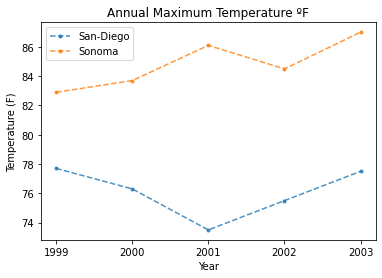

In [57]:
f, ax = plt.subplots()
for title, group in all_data.groupby('location'):
    group.plot(x='Year', 
        y='annual_max_temp',
        title="Annual Maximum Temperature ºF",
        label=title,
        style='.--',
        ax=ax, 
        alpha=.8)

    
ax.set(xlabel="Year", ylabel="Temperature (F)", xticks=[1999, 2000, 2001, 2002, 2003])

plt.show()